## 1. Analiza sedežnega reda

Na sliki je zaslonski posnetek visoko specializirane programske opreme, ki jo letalske družbe uporabljajo za razporejanje potnikov. Na primeru s slike, na sedežu 2D sedi potnica z imenom Cilka.

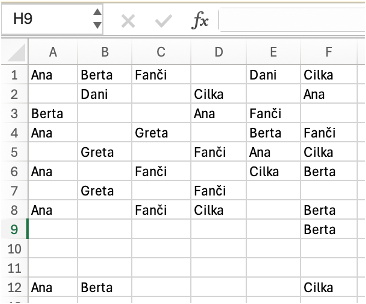

Programska oprema izvozi podatke v datoteko s takšno vsebino:

```
Ana,Berta,Fanči,,Dani,Cilka
,Dani,,Cilka,,Ana
Berta,,,Ana,Fanči,
Ana,,Greta,,Berta,Fanči
,Greta,,Fanči,Ana,Cilka
Ana,,Fanči,,Cilka,Berta
,Greta,,Fanči,,
Ana,,Fanči,Cilka,,Berta
,,,,,Berta
,,,,,
,,,,,
Ana,Berta,,,,Cilka
```

Gre seveda zgolj za primer, v splošnem so imena in razpored lahko tudi drugačni.

Napišite naslednje funkcije:

- `popularnost(ime_dat)` prejme ime datoteke z razporedom in vrne seznam ali tabelo v numpy s šestimi elementi, ki ustrezajo šestim stolpcem (A-F). Vrednosti povedo, koliko mest v posameznem stolpcu je zasedenih. Za gornji primer vrne `[6, 5, 4, 5, 5, 8]`.
- `naj_stolpec(ime_dat)` vrne najpopularnejši stolpec. V gornjem primeru vrne `"F"`. Če si mesto najpopularnejšega deli več stolpcev, sme vrniti poljubnega.
- `po_imenih(ime_dat)` vrne slovar, katerega ključi so imena potnikov, vrednosti pa število potnikov s tem imenom. V gornjem primeru vrne `{'Ana': 8, 'Berta': 7, 'Cilka': 6, 'Dani': 2, 'Fanči': 7, 'Greta': 3}`.
- `naj_stolpec_ime(ime_dat, ime)` vrne najpopularnejši stolpec med potniki s podanim imenom. Klic `naj_stolpec_ime("razpored.csv", "Fanči")` vrne `"C"`, ker največ potnikov z imenom Fanči sedi v stolpcu C.
- `prazne_vrste(ime_dat)` vrne seznam ali tabelo s številkami praznih vrst. V gornjem primeru vrne `[10, 11]`. Predpostavite, da je število vrst v letalu enako številu vrstic datoteke.

Namig: Letalske družbe številčijo vrste tako, da ima prva vrsta številko 1, ne 0.

Namig: `"ABCDEF"[2]` vrne `"C"`.

#### Rešitev

Tole je naloga iz uporabe numpyja.

In [1]:
def razpored(ime_datoteke):
    return np.genfromtxt(ime_datoteke, delimiter=",", encoding="utf-8", dtype=str)

def popularnost(ime_datoteke):
    return np.sum(razpored(ime_datoteke) != "", axis=0)

def naj_stolpec(ime_datoteke):
    return "ABCDEF"[np.argmax(popularnost(ime_datoteke))]

def po_imenih(ime_datoteke):
    imena, stevila = np.unique(razpored(ime_datoteke), return_counts=True)
    return {str(ime): int(stevilo) for ime, stevilo in zip(imena, stevila) if ime}

def naj_stolpec_ime(ime_datoteke, ime_osebe):
    return "ABCDEF"[np.argmax(np.sum(razpored(ime_datoteke) == ime_osebe, axis=0))]

def prazne_vrste(ime_datoteke):
    return np.flatnonzero(np.all(razpored(ime_datoteke) == "", axis=1)) + 1

Funkcijo `razpored` smo si napisali, da ne bi v vseh funkcija ponavljali enega in istega klica `genfromtxt`. Seveda gre tudi brez.

- Funkcija `popularnost` mora povedati, koliko elementov posamičnega stolpca (torej: sedežev) je nepraznih.
- Funkcija `naj_stolpec` očitno pokliče prejšnjo funkcijo in nato poišče indeks največje vrednosti. Kako to spremeniti v črko, je povedal namig.
- Za `po_imenih` je najbolj prikladno uporabiti `unique`. To je pravzaprav tudi najbolj zoprna izmed funkcij, ki jih je bilo potrebno napisati. No, niti ne: spodaj jo bomo pokazali preprostjšo rešitev.
- V `naj_stolpec_ime` napišemo vse, kar smo napisali v `popularnost` in `naj_stolpec`: edina razlika je, da `!= ""` zamenjamo z `== ime_osebe`.
- V `prazne_vrste` z `razpored(ime_datoteke) == ""` označimo prazne sedeže s `True`, neprazne s `False`. Nato z `np.all` po osi `axis=1` poiščemo vrstice, v katerih so prosti vsi sedeži. Tako dobimo en sam stolpec `True`-jev in `False`-ov. `flatnonzero` nam pove indekse `True`-jev; k njim prištejemo 1, ker letalske družbe, kot opozarjajo navodila naloge, štejejo vrste od `1` naprej.

`po_imenih` bi bilo marsikomu najbrž lažje napisati brez `numpy`-ja.

In [ ]:
def po_imenih(ime_datoteke):
    stevci = {}
    for vrstica in open(ime_datoteke):
        for ime in vrstica.strip().split(","):
            if ime == "":
                continue
            if ime not in stevci:
                stevci[ime] = 0
            stevci[ime] += 1
    return stevci

Nekoliko lažje je z defaultdict.

In [4]:
def po_imenih(ime_datoteke):
    stevci = defaultdict(int)
    for vrstica in open(ime_datoteke):
        for ime in vrstica.strip().split(","):
            if ime != "":
                stevci[ime] += 1
    return stevci

Seveda lahko brez `numpy`-ja napišemo tudi vse ostale funkcije. Vendar sem za to prelen. Ni grozno težko, samo jaz sem grozno len.

Samo toliko: če se lotite brez `numpy`, lahko datoteke berete in razkosavate sami, kot v gornjem primeru, ali pa uporabite `csv.reader`. `csv.DictReader`, ki so ga poskušali uporabljati nekateri, pa ne bo deloval, ker datoteka nima "glave", torej vrstice z imeni stolpcev, temveč se podatki začnejo že v prvi vrstici.

## 2. Prehranska problematika

Napišite funkcijo `posebne_zelje(zelje)`, ki prejme slovar, katerega ključi so oznake posebnih želja glede hrane, na primer VEG za vegeratijansko, GLU za brezglutensko in tako naprej. Pripadajoče vrednosti so seznami sedežev, kjer sedijo potniki, ki jim je potrebno postreči takšno hrano.

```
{"GLU": ["2B", "4F"],
 "LAK": ["1A", "2B", "5F", "8A"],
 "ORE": ["2B", "1A"],
 "VEG": ["2B", "4C", "5B", "7B", "5E"]}
```

Funkcija `posebne_zelje` mora vrniti število potnikov s posebnimi željami. Potnika, ki prosi tudi za brezglutenski vegetarijanski obrok brez laktoze, štejte enkrat, ne trikrat.

#### Rešitev

Koristno je, da se spomnimo, da lahko unikatne reči preštejemo tako, da jih zmečemo v množico in pogledamo velikost množice. Množica namreč vsebuje vsak element le enkrat. Če namesto tega uporabljamo seznam, je potrebno dodati pogoj, ki preverja, da nekega elementa še ni v seznamu.

Končno, množice imajo unijo, tako da nam ni potrebno dodajati vsakega elementa posebej.

In [1]:
def posebne_zelje(zelje):
    posebni = set()
    for mesta in zelje.values():
        posebni |= set(mesta)
    return len(posebni)

Krajše pa gre tako:

In [2]:
def posebne_zelje(ime_datoteke):
    return len({mesto for zelja in zelja.values() for mesto in zelja})

## 3. Navodila za stevardese

Napišite funkcijo `navodila(ime_razpored, zelje, ime_navodila)`, ki prejme ime datoteke z razporedom (kot v 1. nalogi), in slovar želja  (kot v 2. nalogi). Tretji argument je ime datoteke, ki jo mora ustvariti ta funkcija in vanjo zapisati navodila za stevardese v takšni obliki:

```
Ana (1A): LAK, ORE
Ana (5E): VEG
Ana (8A): LAK
Cilka (5F): LAK
Dani (2B): GLU, LAK, ORE, VEG
Fanči (4F): GLU
Greta (4C): VEG
Greta (5B): VEG
Greta (7B): VEG
```

Za polne točke naj bodo tako imena kot kode želja (GLU, LAK ...) urejene po abecedi. Osebe z enakim imenom uredite po sedežih, katerih oznake – da bo lažje – obravnavajte kot nize: 14A naj bo pred 5A, ker je niz "14A" po abecedi prej kot "5A".

#### Rešitev

Tole je bila naloga iz slovarjev. Podatki so urejeni po željah, izpisovati pa je potrebno po potnikih, zato moramo, preden začnemo izpisovati, zbrati podatke o vsakem potniku. Potrebujemo torej slovar, katerega ključi so potniki - njihova imena in sedeži. Pripadajoče vrednosti so lahko seznami ali množice.

Ko so podatki zbranih, jih urejeno izpišemo v datoteko.

In [3]:
from collections import defaultdict

def navodila(ime_razpored, zelje, ime_navodila):
    imena = razpored(ime_razpored)
    potrebe = defaultdict(set)
    for tip, mesta in zelje.items():
        for mesto in mesta:
            vrsta = int(mesto[:-1])
            stolpec = "ABCDEF".index(mesto[-1])
            potrebe[f"{imena[vrsta - 1, stolpec]} ({mesto})"].add(tip)

    with open(ime_navodila, "w") as f:
        for ime, tipi in sorted(potrebe.items()):
            f.write(f"{ime}: {', '.join(sorted(tipi))}\n")

Manjša zafrkancija je znotraj notranje zanke: da najdemo ime potnika, moramo pretvoriti oznako sedeže, na primer 25B v številko vrstice in stolpca. Številko vrstice dobimo tako, da odbijemo zadnji znak (`mesto[:-1]`) in to pretvorimo v `int`. Številko stolpca dobimo tako, da naredimo obratno kot v prvi nalogi: vzamemo prvi znak in jo z `"ABCDEF".index(...)` pretvorimo v zaporedno številko. V praksi tule ne bi uporabili `index`-a, temveč nekaj učinkovitejšega. Čeprav je tule tudi z `index` vse OK.

## 4. Prestopi

Imamo slovar leti. Ključi so kode letov, vrednosti pa seznami letov, na katere je mogoče (neposredno) prestopati s tega leta.

```
```

Napišite funkcijo `mozni_leti(let, prestopanj)`, ki prejme kodo nekega leta in največje dovoljeno število prestopanj (lahko tudi 0). Vrniti mora množico kod vseh letov (vključno s podanim), na katere lahko pride potnik, ki se vkrca na podani let in prestopa največ tolikokrat, kolikor določa argument.

Lažja različica (za manj točk): napišite funkcijo `mozni_leti(let)`, ki vrne isto, vendar brez omejitve števila prestopanj.

#### Rešitev

Vedno eno in isto. Tole je enako nabiranju imen v rodbini. Rešitev je

In [6]:
def mozni_leti(let):
    mozno = {let}
    for nalet in leti[let]:
        mozno |= mozni_leti(nalet)
    return mozno

To je seveda preprostejša različica. Če rešujemo težjo, ne imamo še argument `globina`, ki pove, kdaj se moramo ustaviti.

In [4]:
def mozni_leti(let, globina):
    mozno = {let}
    if globina > 0:
        for nalet in leti[let]:
            mozno |= mozni_leti(nalet, globina - 1)
    return mozno

## Celotna rešitev

Tule je rešitev celotnega izpita v neki ne-pregrozni obliki. Vidimo, da imamo veliko dela le s tretjo nalogo.

In [10]:
from collections import defaultdict
import json
import re

import numpy as np

# 1

def razpored(ime_datoteke):
    return np.genfromtxt(ime_datoteke, delimiter=",", encoding="utf-8", dtype=str)

def popularnost(ime_datoteke):
    return np.sum(razpored(ime_datoteke) != "", axis=0)

def naj_stolpec(ime_datoteke):
    return "ABCDEF"[np.argmax(popularnost(ime_datoteke))]

def po_imenih(ime_datoteke):
    imena, stevila = np.unique(razpored(ime_datoteke), return_counts=True)
    return {str(ime): int(stevilo) for ime, stevilo in zip(imena, stevila) if ime}

def naj_stolpec_ime(ime_datoteke, ime_osebe):
    return "ABCDEF"[np.argmax(np.sum(razpored(ime_datoteke) == ime_osebe, axis=0))]

def prazne_vrste(ime_datoteke):
    return np.flatnonzero(np.all(razpored(ime_datoteke) == "", axis=1)) + 1


# 2

def posebne_zelje(zelje):
    posebni = set()
    for mesta in zelje.values():
        posebni |= set(mesta)
    return len(posebni)


# 3

def navodila(ime_razpored, zelje, ime_navodila):
    imena = razpored(ime_razpored)
    potrebe = defaultdict(set)
    for tip, mesta in zelje.items():
        for mesto in mesta:
            vrsta = int(mesto[:-1])
            stolpec = "ABCDEF".index(mesto[-1])
            potrebe[f"{imena[vrsta - 1, stolpec]} ({mesto})"].add(tip)

    with open(ime_navodila, "w") as f:
        for ime, tipi in sorted(potrebe.items()):
            f.write(f"{ime}: {', '.join(sorted(tipi))}\n")


# 4

def mozni_leti(let, globina):
    mozno = {let}
    if globina > 0:
        for nalet in leti[let]:
            mozno |= mozni_leti(nalet, globina - 1)
    return mozno